<a href="https://colab.research.google.com/github/lalin15rv-bit/Inteligencia-Artificial/blob/main/Multicapa/Habilidades.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd     #importamos las librerias que necesitaremos

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [ ]:
df

,python,sql,visualizacion_datos,excel,manejo_apis,nube,estadistica,probabilidad,algebra_lineal,calculo,optimizacion,modelado,trabajo_equipo,comunicacion,creatividad,adaptabilidad,liderazgo,resolucion_problemas
0,99,91,89,84,94,97,80,61,81,75,86,63,59,67,62,55,71,70
1,89,97,71,71,93,90,61,71,86,80,77,62,77,72,52,64,50,80
2,75,72,83,73,94,98,66,73,77,90,74,86,65,82,68,55,50,53
3,79,86,70,97,100,86,63,65,87,66,78,77,74,70,63,79,50,66
4,72,90,74,73,100,78,72,90,85,67,76,85,81,67,51,84,77,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,78,96,74,90,85,92,63,75,61,81,77,64,72,79,63,55,78,71
4996,75,77,94,85,89,78,62,63,65,70,77,61,82,84,79,83,51,64
4997,94,72,92,77,81,100,63,78,71,89,86,70,60,65,63,80,58,60
4998,86,89,90,80,91,87,73,90,84,63,84,82,63,61,57,83,77,67


In [ ]:
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)       #Calcula el promedio de habilidades tecnológicas del trabajador
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)   #Calcula el promedio matematico del trabajador
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)      #Calcula el promedio de una forma psicológicas del trabajador
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3    #Calcula el promedio de cada habilidad dividido por cada habilidad
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)
                                              #Nos ayuda a la forma de los conjuntos de entrenamiento y de prueba
# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),      #Esta es la capa de entrada y la primera capa oculta
    Dense(32, activation='relu'),          #Es la función de activación para las capas ocultas                               #Segunda capa oculta
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')        #Es  nuestra capa de salida
])

adam = Adam(learning_rate=0.001)        #Utilizamos el optimizador
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = modelo.fit(
    X_train, y_train,       #Es el conjunto de datos de entrenamiento "X" y "Y" Son las etiquetas de entrenamiento.
    epochs=50,          #Es el número de epocas del entrenamiento
    batch_size=8,         #Especifica el número de los lotes
    validation_data=(X_test, y_test),         #Se utiliza para para evaluar la perdidad y las métricas del modelo
    verbose=1           #Conrola la cantidad de información
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7852 - loss: 0.4186 - val_accuracy: 0.9560 - val_loss: 0.1079
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9669 - loss: 0.0840 - val_accuracy: 0.9670 - val_loss: 0.0710
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9818 - loss: 0.0467 - val_accuracy: 0.9720 - val_loss: 0.0632
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0340 - val_accuracy: 0.9660 - val_loss: 0.0813
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0316 - val_accuracy: 0.9730 - val_loss: 0.0784
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9952 - loss: 0.0163 - val_accuracy: 0.9730 - val_loss: 0.0734
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9933 - loss: 0.0163 - val_accuracy: 0.9700 - val_loss: 0.0761
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0149 - val_accuracy: 0.

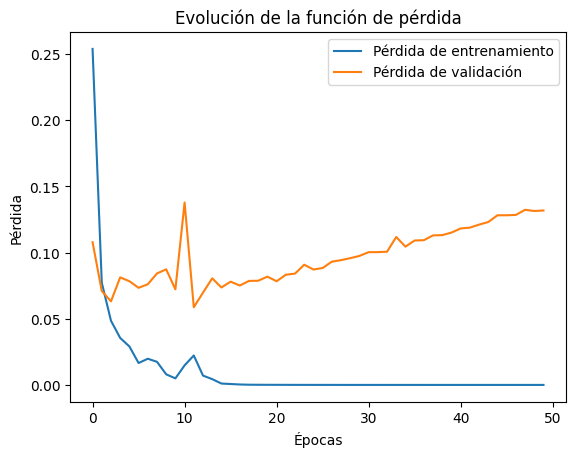

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9869 - loss: 0.0790

🔹 Loss: 0.1318  |  Accuracy: 0.9780


In [ ]:
import matplotlib.pyplot as plt         #importamos la biblioteca que nos ayud a hacer la tabla

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')     #Disminuye al momento del modelo entrena
plt.plot(history.history['val_loss'], label='Pérdida de validación')        #Aprende patrones con un modelo es un momento de datos
plt.xlabel('Épocas')        #nombre del eje en x
plt.ylabel('Pérdida')           #Nombre del eje en y
plt.legend()
plt.title('Evolución de la función de pérdida')       #titulo de la gráfica
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


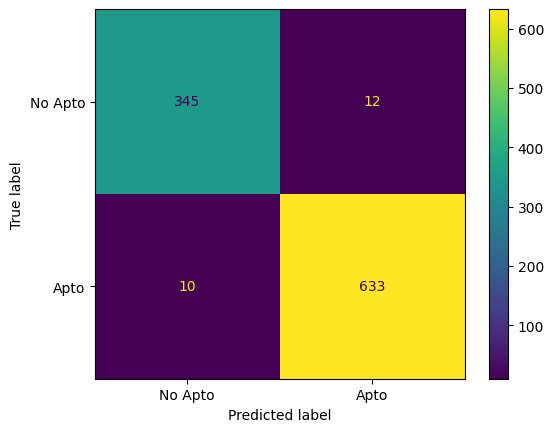


Sensitivity (Recall) por clase:
No Apto: 0.97
Apto: 0.98


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score        #importamos las herramientas necesarias del modulo

pred = modelo.predict(X_test)           #calcula la matriz
y_pred = np.argmax(pred, axis=1)        #Vizualizar la matriz
y_true = np.argmax(y_test, axis=1)      #calcular la metrica de sensibilidad

cm = confusion_matrix(y_true, y_pred)           #Utiliza el modelo y calcula la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])        #nos ayuda a que es una clasificación binaria
disp.plot(cmap='viridis')         #Colocamos de que color queremos nuestro visual
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)        #calcula la sensibilidad
print("\nSensitivity (Recall) por clase:")        #Es el encabezado
print(f"No Apto: {sensitivity[0]:.2f}")      #Imprimen la de la clase no apto
print(f"Apto: {sensitivity[1]:.2f}")          #Imprimen la de la clase apto

In [ ]:

nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Evaluación de nuevo candidato:
Resultado: Apto


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# @title Título
parametro_uno = x1 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x2 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x3 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x4 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x5 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x6 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x7 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x8 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x9 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x10 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x11 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x12 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x13 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x14 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x15 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x16 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x17 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}
parametro_uno = x18 # @param {"type":"integer","placeholder":"Esto es lo que se ve en el campo cuando está vacio"}

nuevo_candidato = np.array([[x1, x2, x3, x4, x5, x6,   # técnicas
                             x7, x8, x9, x10, x11, x12,   # matemáticas
                             x13, x14, x15, x16, x17, x18]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")


NameError: name 'x1' is not defined